## Jupyter Notebook Show information for Capstone Project - Battle of the Neighbourhoods - Edmonton

## Import libraries and dependencies

In [1]:
import requests
import lxml
import numpy as np
import pandas as pd
from pandas import DataFrame
import urllib.request
from bs4 import BeautifulSoup
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

print('Libraries imported.')

Libraries imported.


## Bring in data on neighbourhoods and the location of the neighbourhoods from the City of Edmonton Open Data Portal. This is being read in as a json file.

In [2]:
# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://dashboard.edmonton.ca/resource/3b6m-fezs.json'

# Load the first sheet of the JSON file into a data frame
df_Ed = pd.read_json(url, orient='columns')

# View the first ten rows
df_Ed.head(10)

,number,name_mixed,area_sq_km,latitude,longitude,location,:@computed_region_7ccj_gre3,:@computed_region_ecxu_fw7u,:@computed_region_izdr_ja4x,:@computed_region_5jki_au6x,:@computed_region_mnf4_kaez,:@computed_region_eq8d_jmrp,:@computed_region_da6r_6gkw
0,4477,Kinglet Gardens,2.637129,53.577379,-113.701417,"{'latitude': '53.57737927243443', 'longitude':...",301,137.0,3.0,1.0,1.0,195.0,1.0
1,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881,"{'latitude': '53.59221129676067', 'longitude':...",312,53.0,3.0,1.0,1.0,10.0,1.0
2,6492,Mill Creek Ravine South,0.758605,53.507712,-113.464836,"{'latitude': '53.50771159416601', 'longitude':...",157,67.0,7.0,5.0,3.0,242.0,11.0
3,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203,"{'latitude': '53.62763458998669', 'longitude':...",379,60.0,1.0,1.0,5.0,17.0,2.0
4,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951,"{'latitude': '53.58217611124326', 'longitude':...",183,107.0,3.0,1.0,5.0,162.0,2.0
5,5505,Ambleside,3.143942,53.430640,-113.600677,"{'latitude': '53.43064045930849', 'longitude':...",306,78.0,8.0,6.0,12.0,8.0,9.0
6,4464,The Uplands,3.572662,53.461707,-113.658220,"{'latitude': '53.461707245797', 'longitude': '...",363,149.0,5.0,4.0,8.0,356.0,5.0
7,6020,Avonmore,0.897090,53.507780,-113.451631,"{'latitude': '53.50777958168241', 'longitude':...",188,73.0,7.0,5.0,3.0,25.0,11.0
8,4012,Anthony Henday South West,4.547852,53.464532,-113.637545,"{'latitude': '53.464531808398306', 'longitude'...",357,15.0,5.0,4.0,8.0,22.0,5.0
9,2590,Overlanders,0.841196,53.581011,-113.388176,"{'latitude': '53.581010650540904', 'longitude'...",244,29.0,2.0,3.0,7.0,267.0,4.0


## Cleaning up neighbourhood data.

In [3]:
df_Ed = df_Ed.drop(['location', ':@computed_region_7ccj_gre3', ':@computed_region_ecxu_fw7u',':@computed_region_izdr_ja4x',':@computed_region_da6r_6gkw',':@computed_region_eq8d_jmrp',':@computed_region_mnf4_kaez',':@computed_region_5jki_au6x' ], axis=1)

In [4]:
df_Ed.head(10)

,number,name_mixed,area_sq_km,latitude,longitude
0,4477,Kinglet Gardens,2.637129,53.577379,-113.701417
1,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881
2,6492,Mill Creek Ravine South,0.758605,53.507712,-113.464836
3,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203
4,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951
5,5505,Ambleside,3.143942,53.430640,-113.600677
6,4464,The Uplands,3.572662,53.461707,-113.658220
7,6020,Avonmore,0.897090,53.507780,-113.451631
8,4012,Anthony Henday South West,4.547852,53.464532,-113.637545
9,2590,Overlanders,0.841196,53.581011,-113.388176


In [6]:
df_Ed = df_Ed.rename(columns={'name_mixed': 'neighbourhood'})

## Final neighbourhood data.

In [7]:
df_Ed.head(10)

,number,neighbourhood,area_sq_km,latitude,longitude
0,4477,Kinglet Gardens,2.637129,53.577379,-113.701417
1,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881
2,6492,Mill Creek Ravine South,0.758605,53.507712,-113.464836
3,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203
4,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951
5,5505,Ambleside,3.143942,53.430640,-113.600677
6,4464,The Uplands,3.572662,53.461707,-113.658220
7,6020,Avonmore,0.897090,53.507780,-113.451631
8,4012,Anthony Henday South West,4.547852,53.464532,-113.637545
9,2590,Overlanders,0.841196,53.581011,-113.388176


In [5]:
df_Ed.shape

(400, 5)

## The data on crime in Edmonton was also found on the City of Edmonton Open Data Portal. However, I downloaded the data and limited to only 2019 data in a .csv format. This was primarily done as the json would only include the first 1000 rows of the over 100, 000 rows in the data set.

In [8]:
data = pd.read_csv("C:\\Users\heyyou911\Documents\EPS_Neighbourhood_Criminal_Occurrences.csv")
df_edcrime = pd.DataFrame(data)

In [9]:
df_edcrime.head(10)

,number,neighbourhood,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Grand Total
0,1090,DOWNTOWN,420.0,147.0,1.0,67.0,28.0,321.0,66.0,13.0,1063
1,1030,CENTRAL MCDOUGALL,278.0,60.0,NaN,21.0,22.0,108.0,63.0,12.0,564
2,1150,OLIVER,94.0,105.0,NaN,25.0,15.0,242.0,58.0,6.0,545
3,1140,MCCAULEY,269.0,63.0,2.0,27.0,13.0,119.0,46.0,3.0,542
4,1020,BOYLE STREET,174.0,65.0,1.0,14.0,28.0,102.0,44.0,6.0,434
5,1010,ALBERTA AVENUE,118.0,99.0,NaN,16.0,13.0,127.0,53.0,4.0,430
6,1180,QUEEN MARY PARK,91.0,77.0,NaN,17.0,10.0,123.0,66.0,6.0,390
7,5480,STRATHCONA,80.0,79.0,NaN,22.0,13.0,153.0,33.0,6.0,386
8,5200,GARNEAU,31.0,82.0,NaN,7.0,4.0,151.0,24.0,5.0,304
9,2080,BELVEDERE,67.0,64.0,NaN,10.0,7.0,93.0,53.0,5.0,299


In [10]:
df_edcrime.shape

(373, 11)

## Merging the neighbourhood data with crime data below.

In [94]:
ed_all = pd.merge(df_Ed, df_edcrime, left_on='number', right_on= 'number')
ed_all.head(10)

,number,neighbourhood,area_sq_km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Grand Total
0,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,4
1,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203,5.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7
2,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951,2.0,5.0,NaN,1.0,NaN,10.0,2.0,NaN,20
3,5505,Ambleside,3.143942,53.430640,-113.600677,10.0,6.0,NaN,1.0,2.0,21.0,9.0,1.0,50
4,4464,The Uplands,3.572662,53.461707,-113.658220,1.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,5
5,6020,Avonmore,0.897090,53.507780,-113.451631,4.0,13.0,NaN,1.0,3.0,28.0,7.0,2.0,58
6,4012,Anthony Henday South West,4.547852,53.464532,-113.637545,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3
7,2590,Overlanders,0.841196,53.581011,-113.388176,9.0,5.0,NaN,2.0,4.0,28.0,10.0,NaN,58
8,6430,McIntyre Industrial,1.570015,53.490341,-113.454914,4.0,9.0,NaN,3.0,1.0,18.0,10.0,2.0,47
9,6170,Davies Industrial West,1.327018,53.498436,-113.450360,2.0,14.0,NaN,1.0,NaN,7.0,4.0,1.0,29


## Creating a map of the Edmonton Neighbourhoods

In [15]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="ed_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [16]:
# create map of Edmonton using latitude and longitude values
map_ed = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood_x in zip(ed_all['latitude'], ed_all['longitude'], ed_all['neighbourhood_x']):
    label = '{}'.format(neighbourhood_x)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ed)  
    
map_ed

In [102]:
data2 = pd.read_csv("C:\\Users\heyyou911\Documents\Office_Data.csv")
Office_df = pd.DataFrame(data2)

## Current office neighbourhoods with crime incidents, restaurants and coffee shops.

In [104]:
Office_df.head(10)

,number,Neighbourhood,latitude,longitude,Total_Crime_Incidents,Restaurants,Coffee_Shops
0,3070,CALDER,53.588056,-113.528872,185,0,0
1,5480,STRATHCONA,53.522390,-113.490986,386,17,3
2,1030,CENTRAL MCDOUGALL,53.553332,-113.501068,564,30,4
3,3440,WESTMOUNT,53.549988,-113.539974,197,12,4
4,1100,EASTWOOD,53.576105,-113.468730,286,6,1
5,6700,STRATHCONA INDUSTRIAL PARK,53.474056,-113.478776,78,9,2
6,3210,GROVENOR,53.545399,-113.571912,45,4,2
7,2010,ABBOTTSFIELD,53.574143,-113.388758,64,2,2
8,6710,STRATHEARN,53.531292,-113.464047,63,2,0
9,1020,BOYLE STREET,53.547631,-113.479263,434,27,5


In [108]:
Office_df2 = Office_df.drop(['number', 'latitude', 'longitude'], axis=1)
Office_df2.head(10)

,Neighbourhood,Total_Crime_Incidents,Restaurants,Coffee_Shops
0,CALDER,185,0,0
1,STRATHCONA,386,17,3
2,CENTRAL MCDOUGALL,564,30,4
3,WESTMOUNT,197,12,4
4,EASTWOOD,286,6,1
5,STRATHCONA INDUSTRIAL PARK,78,9,2
6,GROVENOR,45,4,2
7,ABBOTTSFIELD,64,2,2
8,STRATHEARN,63,2,0
9,BOYLE STREET,434,27,5


In [105]:
# create map of Edmonton using latitude and longitude values
map_ed3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Neighbourhood, Total_Crime_Incidents, Restaurants, Coffee_Shops in zip (Office_df['latitude'], Office_df['longitude'], ed_Top_sm2['Neighbourhood'], ed_Top_sm2['Total_Crime_Incidents'], 
                                                                                     Office_df['Restaurants'], Office_df['Coffee_Shops']):
    label = 'Neighbourhood: {}, Total Crime Incidents in 2019 = {}, Total Restaurants in 1 km = {}, Total Coffee Shops in 1 km = {}'.format(Neighbourhood, Total_Crime_Incidents, Restaurants, Coffee_Shops)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ed3)  
    
map_ed3

In [114]:
CLIENT_ID = 'xxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxx' # your Foursquare Secret
VERSION = 'xxxxxxxxxxx' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxxxxxxxx
CLIENT_SECRET:xxxxxxxxxxx


## Now to explore each of the neighbourhoods we get all the venues in each of the neighbourhoods in a 1 km radius of the centroid of the neighbourhood.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
ed_venues = getNearbyVenues(names=df_Ed['neighbourhood'],
                                   latitudes=df_Ed['latitude'],
                                   longitudes=df_Ed['longitude'],
                                   )
ed_venues.head()

Kinglet Gardens
Anthony Henday Big Lake
Mill Creek Ravine South
Anthony Henday Rampart
Hagmann Estate Industrial
Ambleside
The Uplands
Avonmore
Anthony Henday South West
Overlanders
Anthony Henday Clareview
McIntyre Industrial
Davies Industrial West
Ritchie
Strathcona
Coronet Addition Industrial
Forest Heights
Hudson
Calgary Trail North
Mill Creek Ravine North
River Valley Lessard North
Rosedale Industrial
Garneau
Twin Brooks
Oleskiw
Ogilvie Ridge
Quesnell Heights
Yellowhead Corridor West
Gagnon Estate Industrial
Trumpeter Area
Anthony Henday Terwillegar
River Valley Riverside
Whitemud Creek Ravine South
Klarvatten
Edgemont
Downtown
River Valley Oleskiw
River Valley Glenora
Cameron Heights
Windermere
Gorman
Norwester Industrial
Anthony Henday South
Westmount
McConachie Area
Anthony Henday Mistatim
Chappelle Area
River's Edge
Stillwater
Evergreen
Rhatigan Ridge
Beverly Heights
Girard Industrial
Kildare
River Valley Kinnaird
Richford
Blue Quill
Balwin
Idylwylde
River Valley Windermere
Al

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kinglet Gardens,53.577379,-113.701417,Shoppers Drug Mart,53.570102,-113.705663,Pharmacy
1,Anthony Henday Big Lake,53.592211,-113.647881,St. Albert Lookout,53.591859,-113.643432,Scenic Lookout
2,Anthony Henday Big Lake,53.592211,-113.647881,Iron Mountain,53.587815,-113.642204,Business Service
3,Anthony Henday Big Lake,53.592211,-113.647881,Gateway Builders Inc.,53.586215,-113.641335,Construction & Landscaping
4,Anthony Henday Big Lake,53.592211,-113.647881,Rohit Communities | Starling Landing Townhomes...,53.598983,-113.654261,Construction & Landscaping


In [20]:
print(ed_venues.shape)

(6193, 7)


In [21]:
ed_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kinglet Gardens,53.577379,-113.701417,Shoppers Drug Mart,53.570102,-113.705663,Pharmacy
1,Anthony Henday Big Lake,53.592211,-113.647881,St. Albert Lookout,53.591859,-113.643432,Scenic Lookout
2,Anthony Henday Big Lake,53.592211,-113.647881,Iron Mountain,53.587815,-113.642204,Business Service
3,Anthony Henday Big Lake,53.592211,-113.647881,Gateway Builders Inc.,53.586215,-113.641335,Construction & Landscaping
4,Anthony Henday Big Lake,53.592211,-113.647881,Rohit Communities | Starling Landing Townhomes...,53.598983,-113.654261,Construction & Landscaping


In [22]:
print('There are {} uniques categories.'.format(len(ed_venues['Venue Category'].unique())))

There are 286 uniques categories.


## Here we are pulling out only the venues that are restaurants from the ed_venues dataframe.

In [23]:
Ed_restaurants = ed_venues[ed_venues['Venue Category'].str.contains("Restaurant")]

In [86]:
Total_Ed_Rest = Ed_restaurants.groupby('Neighbourhood').count()
Total_Ed_Rest.head(5)

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Abbottsfield,2,2,2,2,2,2
Albany,4,4,4,4,4,4
Alberta Avenue,3,3,3,3,3,3
Alberta Park Industrial,1,1,1,1,1,1
Allendale,7,7,7,7,7,7


In [25]:
print(Ed_restaurants.shape)

(1304, 7)


## Cleaning the restaurant data.

In [26]:
Total_Ed_Rest2 = Total_Ed_Rest.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'],axis=1)

In [27]:
Total_Ed_Rest2 = Total_Ed_Rest2.rename(columns={'Venue': 'Restaurants'})
Total_Ed_Rest2.head()

,Restaurants
Neighbourhood,
Abbottsfield,2
Albany,4
Alberta Avenue,3
Alberta Park Industrial,1
Allendale,7


## Visualizing the data for the neighbourhoods with the most restaurants.

In [28]:
Total_Ed_Rest2.nlargest(25, 'Restaurants')

,Restaurants
Neighbourhood,
Downtown,31
Central McDougall,30
Boyle Street,27
Queen Alexandra,25
Garneau,24
Stone Industrial,24
Calgary Trail South,23
Oliver,23
McCauley,22


In [29]:
Total_Ed_Rest2.sort_values(by='Restaurants', ascending=False, inplace=True)
Ed_Rest_Top25 = Total_Ed_Rest2['Restaurants'].head(25)
Ed_Rest_Top25

Neighbourhood
Downtown                 31
Central McDougall        30
Boyle Street             27
Queen Alexandra          25
Garneau                  24
Stone Industrial         24
Calgary Trail South      23
Oliver                   23
McCauley                 22
Terra Losa               19
Strathcona               17
Empire Park              16
Rossdale                 16
Glenwood                 16
Calgary Trail North      16
Rideau Park              15
Place LaRue              14
South Edmonton Common    14
University of Alberta    13
Parsons Industrial       12
Westmount                12
Queen Mary Park          12
Duggan                   11
River Valley Victoria    11
Morin Industrial         10
Name: Restaurants, dtype: int64

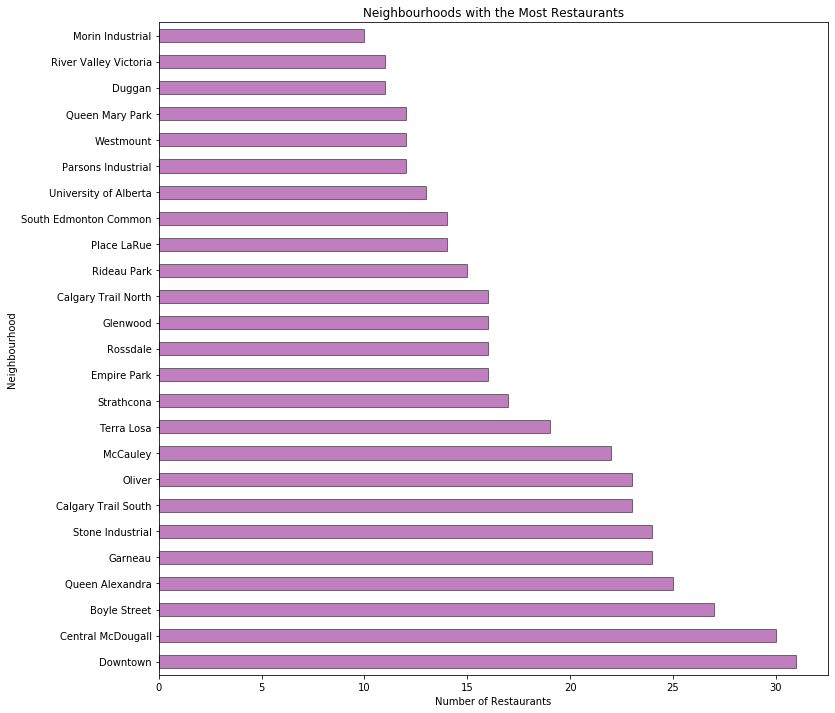

In [30]:
Ed_Rest_Top25.plot(kind='barh', figsize=(12, 12), color='purple', alpha=0.5, edgecolor='black')
plt.xlabel('Number of Restaurants')
plt.title('Neighbourhoods with the Most Restaurants')

plt.show()

## Pulling out the number of coffee shops in each neighbourhood.

In [31]:
Ed_Coffee = ed_venues[ed_venues['Venue Category'].str.contains("Coffee Shop")]

In [89]:
Total_Ed_Coffee = Ed_Coffee.groupby('Neighbourhood').count()
Total_Ed_Coffee.head(5)

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Abbottsfield,2,2,2,2,2,2
Albany,1,1,1,1,1,1
Alberta Park Industrial,1,1,1,1,1,1
Allard,2,2,2,2,2,2
Ambleside,3,3,3,3,3,3


Cleaning and visualizing the neighbourhood coffee shops.

In [33]:
Total_Ed_Coffee2 = Total_Ed_Coffee.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1)

In [34]:
Total_Ed_Coffee2 = Total_Ed_Coffee2.rename(columns={'Venue': 'Coffee_Shops'})

In [35]:
print(Total_Ed_Coffee2.shape)

(222, 1)


In [36]:
Total_Ed_Coffee2.nlargest(25, 'Coffee_Shops')

,Coffee_Shops
Neighbourhood,
Downtown,9
University of Alberta,9
Oliver,8
River Valley Walterdale,8
Glenwood,7
Queen Mary Park,7
River Valley Victoria,7
Rossdale,7
South Edmonton Common,7


In [37]:
Total_Ed_Coffee2.sort_values(by='Coffee_Shops', ascending=False, inplace=True)
Ed_Cof_Top25 = Total_Ed_Coffee2['Coffee_Shops'].head(25)
Ed_Cof_Top25

Neighbourhood
University of Alberta      9
Downtown                   9
River Valley Walterdale    8
Oliver                     8
Stone Industrial           7
River Valley Victoria      7
Rossdale                   7
South Edmonton Common      7
Terra Losa                 7
Glenwood                   7
Queen Mary Park            7
Queen Alexandra            6
Summerlea                  6
Garneau                    6
Spruce Avenue              5
West Meadowlark Park       5
Calgary Trail South        5
Windsor Park               5
Thorncliff                 5
Boyle Street               5
Mill Woods Town Centre     4
Westmount                  4
Morin Industrial           4
Britannia Youngstown       4
Place LaRue                4
Name: Coffee_Shops, dtype: int64

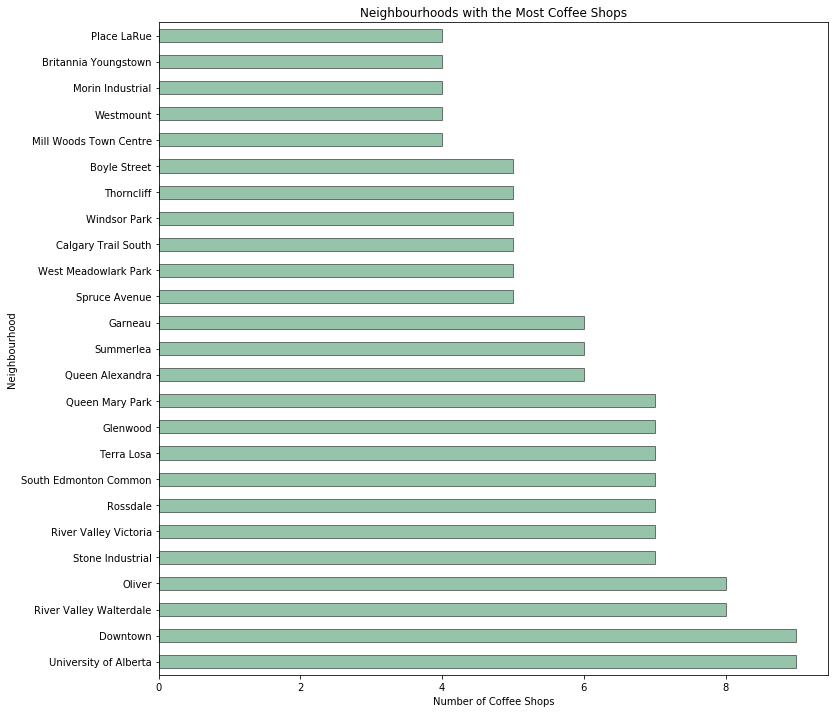

In [111]:
Ed_Cof_Top25.plot(kind='barh', figsize=(12, 12), color='seagreen',alpha=0.5, edgecolor='black')
plt.xlabel('Number of Coffee Shops')
plt.title('Neighbourhoods with the Most Coffee Shops')

plt.show()

## Cleaning the original neighbourhood data and merging the restaurant and coffeeshops into on data frame.

In [38]:
ed_all_final = ed_all.drop(['neighbourhood_y'], axis=1)

In [39]:
ed_all_final.head(10)

,number,neighbourhood_x,area_sq_km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Grand Total
0,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,4
1,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203,5.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7
2,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951,2.0,5.0,NaN,1.0,NaN,10.0,2.0,NaN,20
3,5505,Ambleside,3.143942,53.430640,-113.600677,10.0,6.0,NaN,1.0,2.0,21.0,9.0,1.0,50
4,4464,The Uplands,3.572662,53.461707,-113.658220,1.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,5
5,6020,Avonmore,0.897090,53.507780,-113.451631,4.0,13.0,NaN,1.0,3.0,28.0,7.0,2.0,58
6,4012,Anthony Henday South West,4.547852,53.464532,-113.637545,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3
7,2590,Overlanders,0.841196,53.581011,-113.388176,9.0,5.0,NaN,2.0,4.0,28.0,10.0,NaN,58
8,6430,McIntyre Industrial,1.570015,53.490341,-113.454914,4.0,9.0,NaN,3.0,1.0,18.0,10.0,2.0,47
9,6170,Davies Industrial West,1.327018,53.498436,-113.450360,2.0,14.0,NaN,1.0,NaN,7.0,4.0,1.0,29


In [40]:
ed_all_final = ed_all_final.rename(columns={'number':'Number', 'neighbourhood_x':'Neighbourhood', 'area_sq_km':'Area sq km', 'Grand Total':'Total_Crime_Incidents'})
ed_all_final.head(10)

,Number,Neighbourhood,Area sq km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total_Crime_Incidents
0,4018,Anthony Henday Big Lake,3.217870,53.592211,-113.647881,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,4
1,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203,5.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7
2,3220,Hagmann Estate Industrial,0.527770,53.582176,-113.544951,2.0,5.0,NaN,1.0,NaN,10.0,2.0,NaN,20
3,5505,Ambleside,3.143942,53.430640,-113.600677,10.0,6.0,NaN,1.0,2.0,21.0,9.0,1.0,50
4,4464,The Uplands,3.572662,53.461707,-113.658220,1.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,5
5,6020,Avonmore,0.897090,53.507780,-113.451631,4.0,13.0,NaN,1.0,3.0,28.0,7.0,2.0,58
6,4012,Anthony Henday South West,4.547852,53.464532,-113.637545,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3
7,2590,Overlanders,0.841196,53.581011,-113.388176,9.0,5.0,NaN,2.0,4.0,28.0,10.0,NaN,58
8,6430,McIntyre Industrial,1.570015,53.490341,-113.454914,4.0,9.0,NaN,3.0,1.0,18.0,10.0,2.0,47
9,6170,Davies Industrial West,1.327018,53.498436,-113.450360,2.0,14.0,NaN,1.0,NaN,7.0,4.0,1.0,29


In [41]:
ed_all_final2 = pd.merge(ed_all_final, Total_Ed_Rest2, left_on='Neighbourhood', right_on= 'Neighbourhood')
ed_all_final2.head(10)

,Number,Neighbourhood,Area sq km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total_Crime_Incidents,Restaurants
0,4023,Anthony Henday Rampart,3.150323,53.627635,-113.576203,5.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,7,1
1,5505,Ambleside,3.143942,53.430640,-113.600677,10.0,6.0,NaN,1.0,2.0,21.0,9.0,1.0,50,5
2,6020,Avonmore,0.897090,53.507780,-113.451631,4.0,13.0,NaN,1.0,3.0,28.0,7.0,2.0,58,2
3,2590,Overlanders,0.841196,53.581011,-113.388176,9.0,5.0,NaN,2.0,4.0,28.0,10.0,NaN,58,1
4,6430,McIntyre Industrial,1.570015,53.490341,-113.454914,4.0,9.0,NaN,3.0,1.0,18.0,10.0,2.0,47,2
5,6170,Davies Industrial West,1.327018,53.498436,-113.450360,2.0,14.0,NaN,1.0,NaN,7.0,4.0,1.0,29,2
6,6610,Ritchie,1.270102,53.513275,-113.482742,20.0,35.0,1.0,4.0,2.0,65.0,24.0,6.0,157,9
7,5480,Strathcona,1.563267,53.522390,-113.490986,80.0,79.0,NaN,22.0,13.0,153.0,33.0,6.0,386,17
8,6090,Coronet Addition Industrial,0.433152,53.502729,-113.451653,1.0,9.0,NaN,1.0,NaN,5.0,4.0,NaN,20,3
9,6230,Forest Heights,1.627308,53.544537,-113.451250,22.0,38.0,NaN,7.0,6.0,39.0,10.0,NaN,122,3


In [82]:
ed_all_final3 = pd.merge(ed_all_final2, Total_Ed_Coffee2, left_on='Neighbourhood', right_on= 'Neighbourhood')
ed_all_final3.tail(60)

,Number,Neighbourhood,Area sq km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total_Crime_Incidents,Restaurants,Coffee_Shops
140,2241,Eaux Claires,1.286202,53.621639,-113.485637,18.0,9.0,NaN,5.0,1.0,26.0,23.0,3.0,85,8,2
141,5540,Westbrook Estates,1.165428,53.468213,-113.544452,1.0,6.0,NaN,NaN,1.0,14.0,NaN,1.0,23,1,1
142,2710,Sifton Park,0.504044,53.594525,-113.408402,9.0,3.0,NaN,1.0,2.0,12.0,7.0,1.0,35,9,1
143,5170,Empire Park,1.072124,53.484366,-113.505859,55.0,21.0,NaN,22.0,4.0,70.0,28.0,8.0,208,16,3
144,6290,Hazeldean,1.133185,53.504206,-113.477889,8.0,15.0,NaN,1.0,1.0,41.0,8.0,1.0,75,3,2
145,5320,Pleasantview,1.480391,53.493176,-113.507131,17.0,35.0,NaN,2.0,1.0,44.0,11.0,2.0,112,10,4
146,2230,Delwood,1.334661,53.595949,-113.455130,14.0,20.0,NaN,4.0,2.0,39.0,8.0,1.0,88,6,2
147,3250,Kensington,1.325383,53.595863,-113.528924,12.0,13.0,NaN,4.0,2.0,40.0,9.0,NaN,80,5,1
148,4570,Wedgewood Heights,0.708629,53.478714,-113.646580,1.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,5,1,1
149,3090,Carlisle,0.961897,53.603520,-113.525915,16.0,13.0,NaN,2.0,2.0,31.0,22.0,NaN,86,6,1


In [44]:
print(ed_all_final3.shape)

(200, 16)


## All the data in one dataframe arranged by the neighbourhoods with the most restanrants.

In [45]:
ed_all_final3.nlargest(24, 'Restaurants')

,Number,Neighbourhood,Area sq km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total_Crime_Incidents,Restaurants,Coffee_Shops
16,1090,Downtown,2.309268,53.539767,-113.499421,420.0,147.0,1.0,67.0,28.0,321.0,66.0,13.0,1063,31,9
164,1030,Central McDougall,1.202117,53.553332,-113.501068,278.0,60.0,NaN,21.0,22.0,108.0,63.0,12.0,564,30,4
127,1020,Boyle Street,0.881352,53.547631,-113.479263,174.0,65.0,1.0,14.0,28.0,102.0,44.0,6.0,434,27,5
30,5330,Queen Alexandra,1.235991,53.512220,-113.504812,54.0,52.0,NaN,18.0,10.0,123.0,31.0,6.0,294,25,6
12,5200,Garneau,0.828990,53.519911,-113.513536,31.0,82.0,NaN,7.0,4.0,151.0,24.0,5.0,304,24,6
94,4510,Stone Industrial,0.645861,53.544958,-113.621671,3.0,5.0,NaN,1.0,1.0,18.0,2.0,2.0,32,24,7
132,1150,Oliver,1.709666,53.541983,-113.523994,94.0,105.0,NaN,25.0,15.0,242.0,58.0,6.0,545,23,8
170,5120,Calgary Trail South,0.653891,53.471191,-113.493532,14.0,4.0,NaN,5.0,3.0,22.0,4.0,NaN,52,23,5
192,1140,McCauley,1.498170,53.554605,-113.485098,269.0,63.0,2.0,27.0,13.0,119.0,46.0,3.0,542,22,1
50,4540,Terra Losa,0.761299,53.533293,-113.622178,7.0,7.0,NaN,4.0,NaN,24.0,5.0,2.0,49,19,7


## Limiting the results in the dataframe to include only those neighbourhoods with 11 or more restaurants.

In [46]:
ed_Top=ed_all_final3
ed_Top.drop(ed_Top[ed_Top['Restaurants']<11].index, inplace = True)
ed_Top.head(24)

,Number,Neighbourhood,Area sq km,latitude,longitude,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Total_Crime_Incidents,Restaurants,Coffee_Shops
6,5480,Strathcona,1.563267,53.522390,-113.490986,80.0,79.0,NaN,22.0,13.0,153.0,33.0,6.0,386,17,3
10,5110,Calgary Trail North,0.747188,53.490156,-113.494069,9.0,20.0,NaN,5.0,3.0,52.0,20.0,1.0,110,16,3
12,5200,Garneau,0.828990,53.519911,-113.513536,31.0,82.0,NaN,7.0,4.0,151.0,24.0,5.0,304,24,6
16,1090,Downtown,2.309268,53.539767,-113.499421,420.0,147.0,1.0,67.0,28.0,321.0,66.0,13.0,1063,31,9
20,3440,Westmount,1.864281,53.549988,-113.539974,29.0,61.0,1.0,5.0,4.0,77.0,16.0,4.0,197,12,4
30,5330,Queen Alexandra,1.235991,53.512220,-113.504812,54.0,52.0,NaN,18.0,10.0,123.0,31.0,6.0,294,25,6
37,5360,Rideau Park,0.801661,53.479032,-113.505933,5.0,7.0,NaN,2.0,1.0,29.0,6.0,1.0,51,15,3
43,1200,River Valley Victoria,1.298977,53.534988,-113.523686,5.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,11,11,7
47,4400,Place LaRue,1.041800,53.539008,-113.633323,26.0,8.0,NaN,5.0,3.0,27.0,15.0,1.0,85,14,4
50,4540,Terra Losa,0.761299,53.533293,-113.622178,7.0,7.0,NaN,4.0,NaN,24.0,5.0,2.0,49,19,7


## Limiting the number of columns so it easier to see only the most important data.

In [47]:
ed_Top_sm = ed_Top.drop(['Number', 'Area sq km', 'Assault', 'Break and Enter', 'Homicide','Robbery','Sexual Assaults','Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000'],axis=1)

In [112]:
ed_Top_sm.head(30)

,Neighbourhood,latitude,longitude,Total_Crime_Incidents,Restaurants,Coffee_Shops
37,Rideau Park,53.479032,-113.505933,51,15,3
43,River Valley Victoria,53.534988,-113.523686,11,11,7
47,Place LaRue,53.539008,-113.633323,85,14,4
50,Terra Losa,53.533293,-113.622178,49,19,7
81,Parsons Industrial,53.459795,-113.479382,56,12,2
94,Stone Industrial,53.544958,-113.621671,32,24,7
124,Duggan,53.471510,-113.506058,59,11,2
170,Calgary Trail South,53.471191,-113.493532,52,23,5
183,South Edmonton Common,53.446694,-113.486079,61,14,7
191,Rossdale,53.533155,-113.495797,18,16,7


## Limiting the results to only those neighbourhoods with less than 100 crime incidents in 2019.

In [49]:
ed_Top_sm2 = ed_Top_sm
ed_Top_sm2.drop(ed_Top_sm2[ed_Top_sm2['Total_Crime_Incidents']>100].index, inplace = True)

In [50]:
ed_Top_sm2.head(15)

,Neighbourhood,latitude,longitude,Total_Crime_Incidents,Restaurants,Coffee_Shops
37,Rideau Park,53.479032,-113.505933,51,15,3
43,River Valley Victoria,53.534988,-113.523686,11,11,7
47,Place LaRue,53.539008,-113.633323,85,14,4
50,Terra Losa,53.533293,-113.622178,49,19,7
81,Parsons Industrial,53.459795,-113.479382,56,12,2
94,Stone Industrial,53.544958,-113.621671,32,24,7
124,Duggan,53.471510,-113.506058,59,11,2
170,Calgary Trail South,53.471191,-113.493532,52,23,5
183,South Edmonton Common,53.446694,-113.486079,61,14,7
191,Rossdale,53.533155,-113.495797,18,16,7


In [110]:
ed_Top_sm3 = ed_Top_sm2.drop(['latitude', 'longitude'],axis=1)
ed_Top_sm3.head(15)

,Neighbourhood,Total_Crime_Incidents,Restaurants,Coffee_Shops
37,Rideau Park,51,15,3
43,River Valley Victoria,11,11,7
47,Place LaRue,85,14,4
50,Terra Losa,49,19,7
81,Parsons Industrial,56,12,2
94,Stone Industrial,32,24,7
124,Duggan,59,11,2
170,Calgary Trail South,52,23,5
183,South Edmonton Common,61,14,7
191,Rossdale,18,16,7


## Looking at the locations of the neighbourhoods. 10 neighbourhoods were returned that had a higher number of restaurants and a crime incidents of less than 100 in 2019.

In [51]:
# create map of Edmonton using latitude and longitude values
map_ed2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Neighbourhood, Total_Crime_Incidents, Restaurants, Coffee_Shops in zip (ed_Top_sm2['latitude'], ed_Top_sm2['longitude'], ed_Top_sm2['Neighbourhood'], ed_Top_sm2['Total_Crime_Incidents'], 
                                                                                     ed_Top_sm2['Restaurants'], ed_Top_sm2['Coffee_Shops']):
    label = 'Neighbourhood: {}, Total Crime Incidents in 2019 = {}, Total Restaurants in 1 km = {}, Total Coffee Shops in 1 km = {}'.format(Neighbourhood, Total_Crime_Incidents, Restaurants, Coffee_Shops)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ed2)  
    
map_ed2